# Explicación del cálculo de distancias

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  


---

## Descripción


Este notebook explica el uso del cálculo de las distancias como paso previo para comprender, más adelante, el algoritmo de segmentación.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy 2.0.2
- pandas 2.2.2
- matplotlib 3.10.0
- sklearn 1.6.1

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

BASADO EN : Clustering con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html

# Cálculo de Distancias

El set de datos **USArrests** contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP). Empleando estas variables, se pretende calcular una matriz de distancias que permita identificar los estados más similares.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.metrics.pairwise as pw

import warnings

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

warnings.filterwarnings('ignore')

In [ ]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


In [ ]:
# Escalado de las variables
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True)
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794


In [ ]:
# Cálculo de distancias
print('-'*18)
print('Distancia euclideana')
print('-'*18)
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.iloc[:4,:4]

------------------
Distancia euclideana
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN
Arkansas,1.302905,2.854730,2.74535,NaN


In [ ]:
# Top n observaciones más similares
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(3)

,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.207944
631,New York,Illinois,0.353774
665,Kansas,Indiana,0.433124


In [ ]:
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia').describe().T[['max', 'min']]

,max,min
distancia,6.138335,0.207944


In [ ]:
minima, maxima = np.min(distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna()['distancia']), np.max(distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna()['distancia'])

In [ ]:
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna().query(f"distancia == {minima} or distancia == {maxima}")

,estado_a,estado_b,distancia
444,Vermont,Florida,6.138335
728,New Hampshire,Iowa,0.207944


In [ ]:
matrix = pairwise_distances(X = datos_scaled, metric ='euclidean')
non_diagonal_elements = matrix[np.triu_indices(matrix.shape[0], k = 1)]
min_distance = np.min(non_diagonal_elements)
max_distance = np.max(non_diagonal_elements)

print(f"Distancia máxima {max_distance}")
print(f"Distancia mínima {min_distance}")

print(f"Ubicación distancia máxima {np.argmax(non_diagonal_elements)}")
print(f"Ubicación distancia mínima {np.argmin(non_diagonal_elements)}")


Distancia máxima 6.138334936847243
Distancia mínima 0.20794379761338438
Ubicación distancia máxima 399
Ubicación distancia mínima 608


In [ ]:
matrix[np.triu_indices(n=matrix.shape[0])] = np.nan
distancias_x = pd.DataFrame(
                matrix,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )
distancias_x.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna().sort_values("distancia")

,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.207944
631,New York,Illinois,0.353774
665,Kansas,Indiana,0.433124
1148,Wisconsin,Minnesota,0.499099
928,New Hampshire,Maine,0.504669
...,...,...,...
244,Vermont,California,6.093594
433,North Dakota,Florida,6.096939
1394,Vermont,Nevada,6.105144
1383,North Dakota,Nevada,6.113387


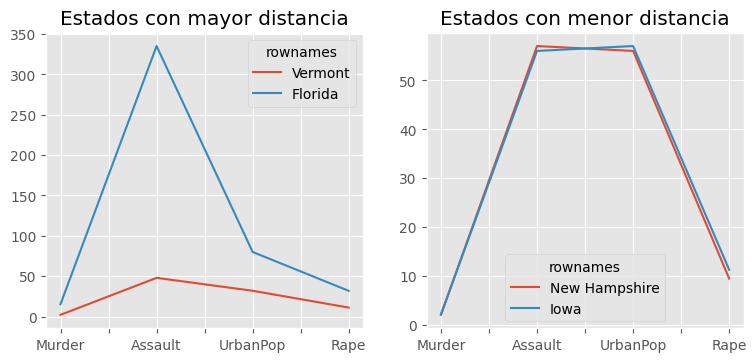

In [ ]:
# Estados con mayor y menor distancia

fig, axs = plt.subplots(1,2, figsize=(9, 3.84))
datos.loc[['Vermont', 'Florida']].transpose().plot(ax= axs[0])
axs[0].set_title('Estados con mayor distancia')
datos.loc[['New Hampshire', 'Iowa']].transpose().plot(ax= axs[1])
axs[1].set_title('Estados con menor distancia');

# EJERCICIO

Dos de las librerías de python que implementan las distancias  (junto con otras) son **sklearn.metrics.pairwise_distances** y **scipy.spatial.distance**.

En concreto, **sklearn** permite calcular las distancias: ‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’, ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’ y ‘yule’.

A partir de los datos de **USArrests** y tomando como guía el ejemplo anterior, calcule a lo menos 4 distancias con distintos métodos y grafique las respectivas similaridades.

In [ ]:
list(pw.PAIRWISE_DISTANCE_FUNCTIONS.keys())

['cityblock',
 'cosine',
 'euclidean',
 'haversine',
 'l2',
 'l1',
 'manhattan',
 'precomputed',
 'nan_euclidean']

In [ ]:
def extremos(datos_scaled : pd.DataFrame, x_metric : str, mas_cercanos : bool = True):
  matrix = pairwise_distances(X = datos_scaled, metric = x_metric)
  matrix[np.triu_indices(n=matrix.shape[0])] = np.nan
  distancias_x = pd.DataFrame(matrix, columns=datos_scaled.index,
                              index = datos_scaled.index)
  if mas_cercanos:
    estado_a = distancias_x.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
        .rename_axis("estado_a") \
        .reset_index() \
        .dropna().sort_values("distancia").head(1)[['estado_a', 'estado_b']].iloc[:,0].iloc[0]

    estado_b = distancias_x.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
        .rename_axis("estado_a") \
        .reset_index() \
        .dropna().sort_values("distancia").head(1)[['estado_a', 'estado_b']].iloc[:,1].iloc[0]
  else:
    estado_a = distancias_x.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
        .rename_axis("estado_a") \
        .reset_index() \
        .dropna().sort_values("distancia").tail(1)[['estado_a', 'estado_b']].iloc[:,0].iloc[0]

    estado_b = distancias_x.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
        .rename_axis("estado_a") \
        .reset_index() \
        .dropna().sort_values("distancia").tail(1)[['estado_a', 'estado_b']].iloc[:,1].iloc[0]
  return estado_a, estado_b


In [ ]:
extremos(datos_scaled, "manhattan", False)

('Vermont', 'Florida')

## Experimento con todas las métricas de distancias disponibles

In [ ]:
review_distances = list(pw.PAIRWISE_DISTANCE_FUNCTIONS.keys())
review_distances.remove('haversine')
review_distances.remove('precomputed')
review_distances

['cityblock', 'cosine', 'euclidean', 'l2', 'l1', 'manhattan', 'nan_euclidean']

In [ ]:
all_distances = {}
for distance in review_distances:
  all_distances[distance] = pairwise_distances(
                X      = datos_scaled,
                metric = distance
             )
all_distances

{'cityblock': array([[0.        , 4.28017974, 4.47808307, ..., 6.22758094, 6.35651097,
         3.13693858],
        [4.28017974, 0.        , 4.50556174, ..., 7.62769621, 9.15236933,
         5.93279694],
        [4.47808307, 4.50556174, 0.        , ..., 8.3400268 , 7.35236237,
         4.97023583],
        ...,
        [6.22758094, 7.62769621, 8.3400268 , ..., 0.        , 3.10438804,
         3.36979097],
        [6.35651097, 9.15236933, 7.35236237, ..., 3.10438804, 0.        ,
         3.21957239],
        [3.13693858, 5.93279694, 4.97023583, ..., 3.36979097, 3.21957239,
         0.        ]]),
 'cosine': array([[0.00000000e+00, 5.49507301e-01, 7.75744092e-01, ...,
         1.12184980e+00, 1.77288454e+00, 1.14589238e+00],
        [5.49507301e-01, 0.00000000e+00, 5.11213839e-01, ...,
         1.31189322e+00, 1.76316106e+00, 1.55746743e+00],
        [7.75744092e-01, 5.11213839e-01, 0.00000000e+00, ...,
         1.91678572e+00, 1.74043111e+00, 1.76561873e+00],
        ...,
        [1.12

## Información de los más cercanos y los más alejados

In [ ]:
for distance in review_distances:
  print("*"*20)
  print(f"Info de {distance}")
  print("*"*20)
  a, b = extremos(datos_scaled, distance, True)
  print(f"Menor distancia es entre {a} y {b}")
  a, b = extremos(datos_scaled, distance, False)
  print(f"Mayor distancia es entre {a} y {b}")

********************
Info de cityblock
********************
Menor distancia es entre New Hampshire y Iowa
Mayor distancia es entre Vermont y Florida
********************
Info de cosine
********************
Menor distancia es entre New Hampshire y Iowa
Mayor distancia es entre Vermont y New York
********************
Info de euclidean
********************
Menor distancia es entre New Hampshire y Iowa
Mayor distancia es entre Vermont y Florida
********************
Info de l2
********************
Menor distancia es entre New Hampshire y Iowa
Mayor distancia es entre Vermont y Florida
********************
Info de l1
********************
Menor distancia es entre New Hampshire y Iowa
Mayor distancia es entre Vermont y Florida
********************
Info de manhattan
********************
Menor distancia es entre New Hampshire y Iowa
Mayor distancia es entre Vermont y Florida
********************
Info de nan_euclidean
********************
Menor distancia es entre New Hampshire y Iowa
Mayor distan

## Gráfico de los resultados

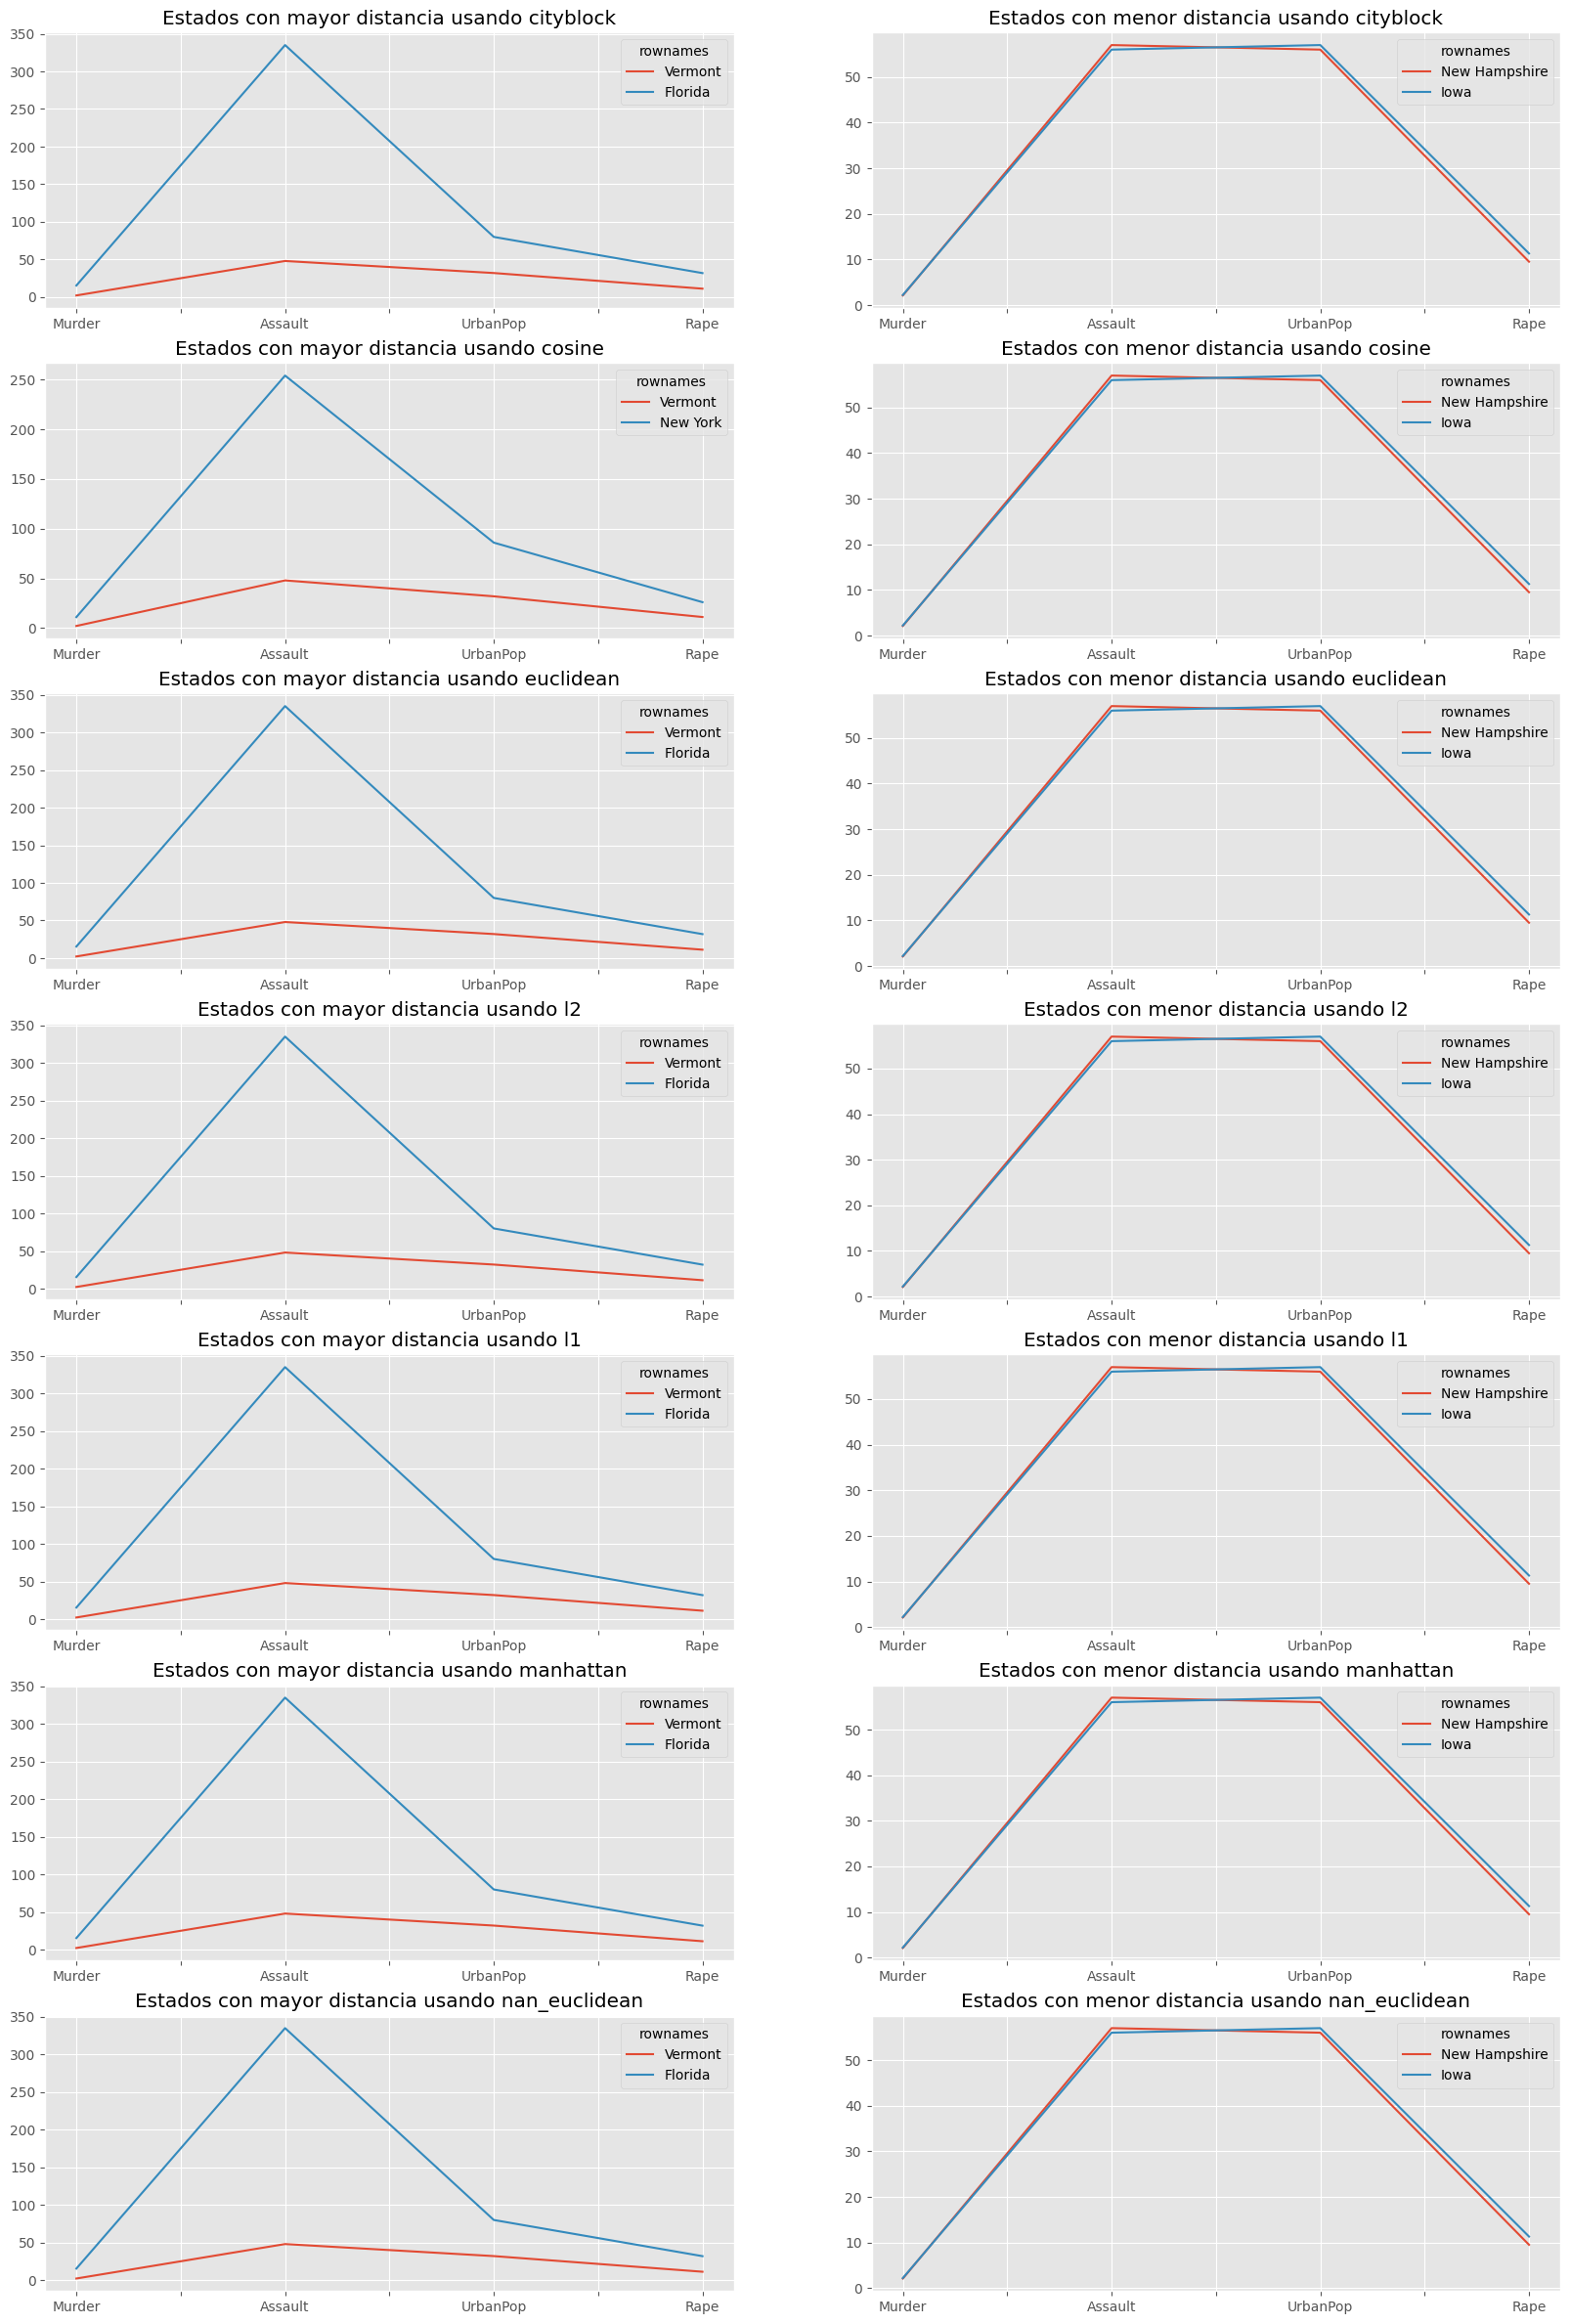

In [ ]:
# Estados con mayor y menor distancia
fig, axs = plt.subplots(len(review_distances),2, figsize=(20, 30))
for index, distance in enumerate(review_distances):
  a, b = extremos(datos_scaled, distance, False)
  datos.loc[[a, b]].transpose().plot(ax= axs[index, 0])
  axs[index, 0].set_title(f'Estados con mayor distancia usando {distance}')
  a, b = extremos(datos_scaled, distance, True)
  datos.loc[[a, b]].transpose().plot(ax= axs[index, 1])
  axs[index, 1].set_title(f'Estados con menor distancia usando {distance}');